In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn as sns

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


IMPORTING NECESSARY LIBRARYS

In [7]:


# Define file path
file_path = "../data/BrentOilPrices.csv"  # Adjust if needed

# Load the dataset
df = pd.read_csv(file_path)

 Converting 'Date' column to datetime format
 

In [10]:

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  


failed_dates = df[df['Date'].isna()]

print(f"Total rows with unrecognized dates: {len(failed_dates)}")
print("\nFirst few rows of the dataset:")
print(df.head())

Total rows with unrecognized dates: 0

First few rows of the dataset:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [11]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Verify the changes
df.info()  # Check data types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


C:\Users\Hp\AppData\Local\Temp\ipykernel_19616\4208642905.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [12]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert non-numeric values to NaN if present

# Check for any issues
df.describe()  # Get summary statistics


,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing prices
df.dropna(subset=['Price'], inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Ensure the dataset is sorted by Date
df = df.sort_values(by='Date')

# Reset the index after sorting
df.reset_index(drop=True, inplace=True)


Missing Values:
 Date     0
Price    0
dtype: int64


In [14]:
print("Total Records:", len(df))
print("Date Range:", df['Date'].min(), "to", df['Date'].max())
print("Price Statistics:\n", df['Price'].describe())


Total Records: 9011
Date Range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Price Statistics:
 count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


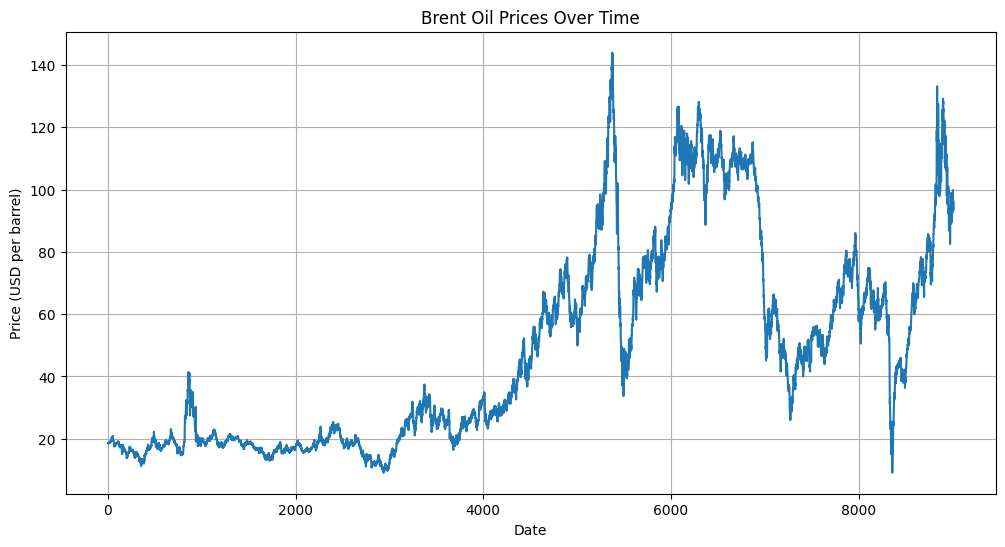

In [ ]:

import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.grid(True)
plt.show()